In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
import joblib

In [24]:
data_path = "../data/processed/btc_features.csv"
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [25]:
# --- Drop Features with Potential Leakage ---
df = df.drop(['High', 'Low', 'Open', 'Price_lag1', 'Price_lag2'], axis=1)

# Features and Target Variable
X = df.drop(['Date', 'Price'], axis=1)
y = df['Price']

# Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [26]:
# Models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [27]:
# Dictionary to store the evaluation metrics for each model
evaluation_metrics = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R^2': r2_score(y_test, y_pred)
    }

    evaluation_metrics[model_name] = metrics

In [28]:
# Evaluate stacking model
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

stacking_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_stack),
    'MSE': mean_squared_error(y_test, y_pred_stack),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stack)),
    'R^2': r2_score(y_test, y_pred_stack)
}

evaluation_metrics['Stacking Model'] = stacking_metrics

In [29]:
# Print the evaluation metrics
print("📋 Model Evaluation Metrics:")
for model_name, metrics in evaluation_metrics.items():
    print(f"\n🔹 {model_name}:")
    for metric_name, value in metrics.items():
        print(f"   {metric_name}: {value:.4f}")

📋 Model Evaluation Metrics:

🔹 Linear Regression:
   MAE: 917.8459
   MSE: 1885065.1907
   RMSE: 1372.9768
   R^2: 0.9972

🔹 Decision Tree:
   MAE: 6847.6724
   MSE: 167791301.0832
   RMSE: 12953.4282
   R^2: 0.7529

🔹 XGBoost:
   MAE: 6414.5683
   MSE: 175087440.1743
   RMSE: 13232.0611
   R^2: 0.7422

🔹 Stacking Model:
   MAE: 1331.5173
   MSE: 3017707.2823
   RMSE: 1737.1549
   R^2: 0.9956


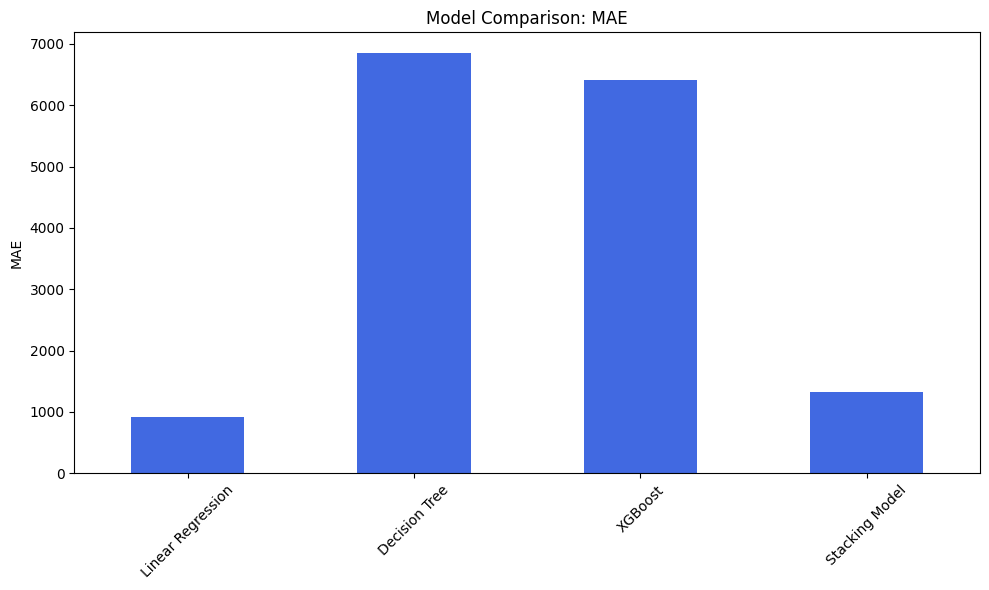

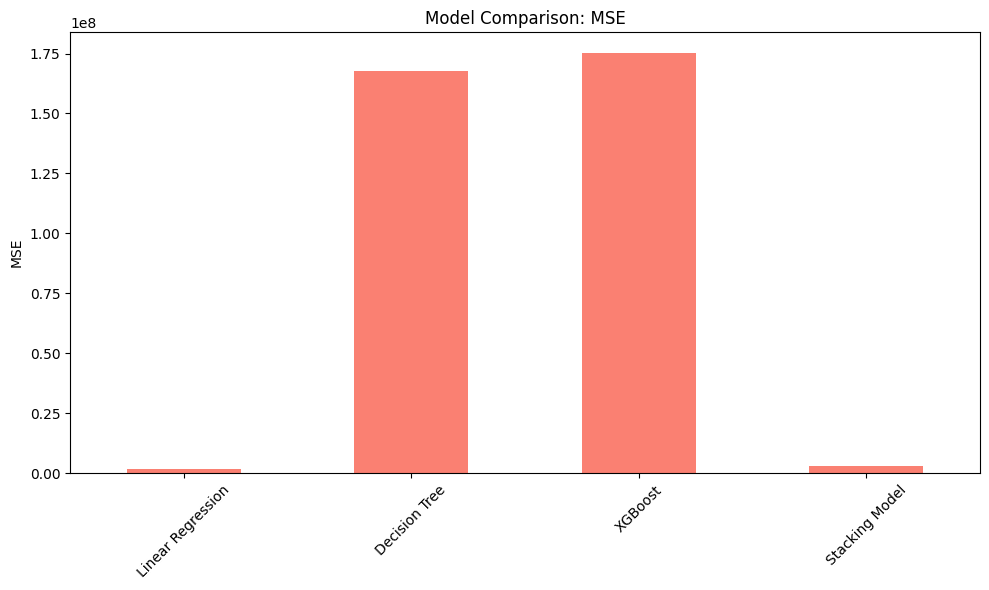

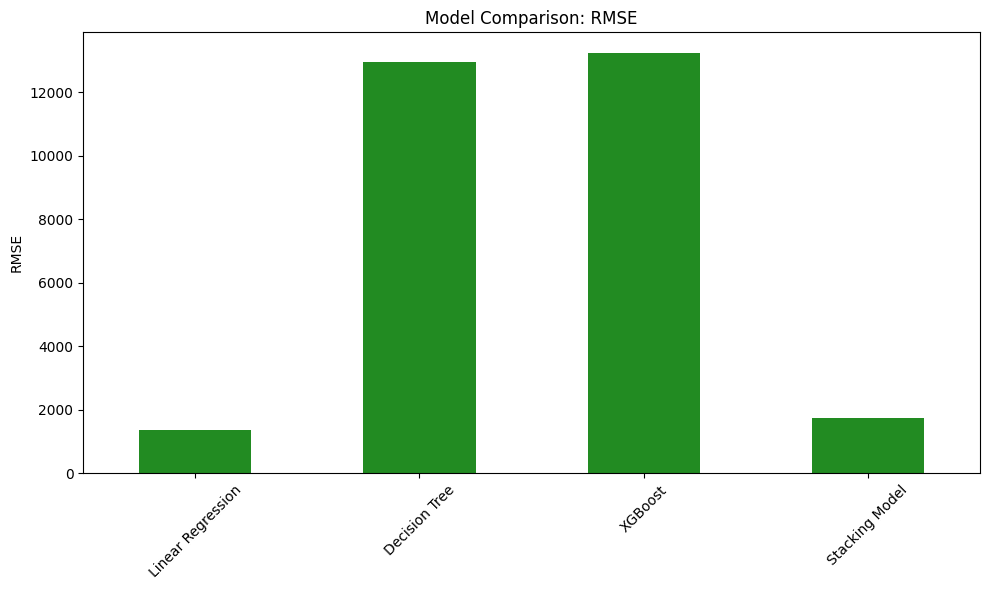

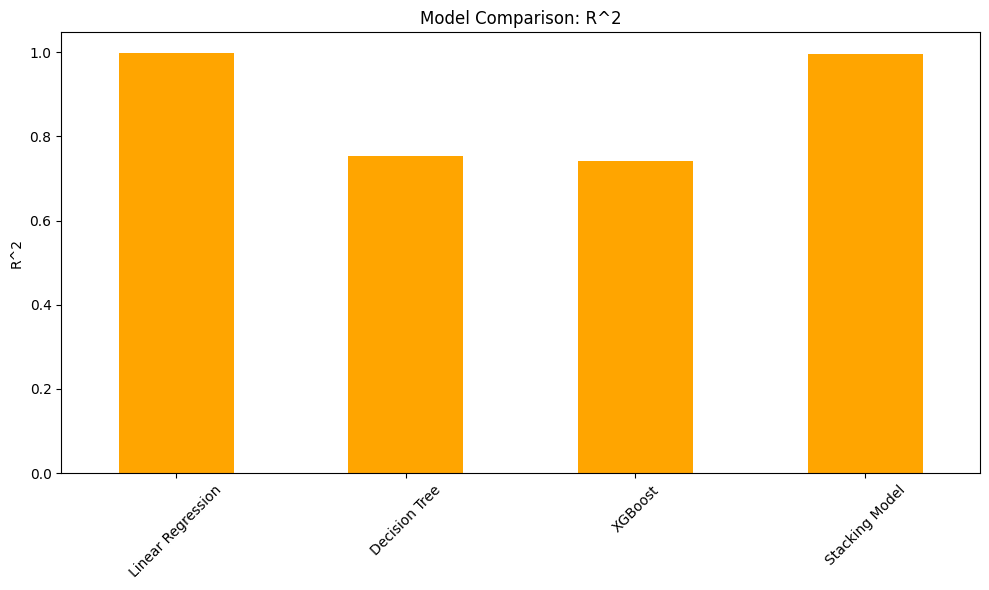

In [30]:
# --- Plotting the Evaluation Metrics ---
# Convert the evaluation metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting each metric separately

# 1. Plot MAE
plt.figure(figsize=(10, 6))
metrics_df['MAE'].plot(kind='bar', color='royalblue')
plt.title('Model Comparison: MAE')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plot MSE
plt.figure(figsize=(10, 6))
metrics_df['MSE'].plot(kind='bar', color='salmon')
plt.title('Model Comparison: MSE')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Plot RMSE
plt.figure(figsize=(10, 6))
metrics_df['RMSE'].plot(kind='bar', color='forestgreen')
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Plot R^2
plt.figure(figsize=(10, 6))
metrics_df['R^2'].plot(kind='bar', color='orange')
plt.title('Model Comparison: R^2')
plt.ylabel('R^2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()